### **MODULE 3: Exploratory Data Analysis (25 points)**

**Pandas Concepts:**

- `.value_counts()`, `.nunique()`
- `.groupby()` 
- `.agg()`, `.transform()`
- `.pivot_table()`, `.crosstab()`
- `.quantile()`, `.corr()`
- `seabron` 

In [2]:
import pandas as pd
from datasets import load_dataset

df = pd.read_csv("/Users/yerko/Desktop/Data Analysis/Project/data/data_jobs")
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"], errors="coerce")
df['job_title_short'].unique()
dataset = load_dataset('lukebarousse/data_jobs')
clean_df = dataset['train'].to_pandas()

df['job_schedule_type'] = clean_df['job_schedule_type']

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Most frequency jobs

Text(0.5, 1.0, 'Most popular jobs')

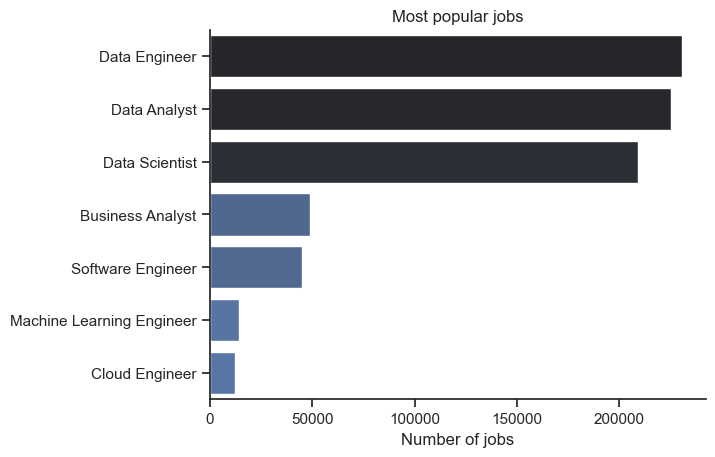

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df['job_title_short'] = df["job_title_short"].str.replace(r'\bsenior\b', '', case=False, regex=True)
df['job_title_short'] = df["job_title_short"].str.strip()
jobs_count = df.groupby("job_title_short").size().sort_values(ascending=False).to_frame(name='count').reset_index()
sns.set_theme(style='ticks')
sns.barplot(data=jobs_count, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.xlabel("Number of jobs")
plt.ylabel("")
plt.title("Most popular jobs")



## Jobs per country

US


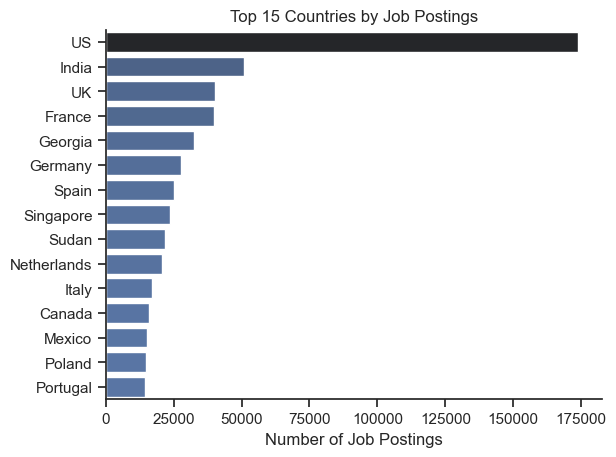

In [8]:
countries_dict = {
    ("France",): "France",
    ("Singapore",): "Singapore",
    ("UK", "United Kingdom"): "UK",
    (
        "AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA",
        "HI","IA","ID","IL","IN","KS","KY","LA","MA","MD",
        "ME","MI","MN","MO","MS","MT","NC","ND","NE","NH",
        "NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC",
        "SD","TN","TX","UT","VA","VT","WA","WI","WV","WY",
        "US","DC","United States"
    ): "US",
    ("India",): "India",
    ("Hong Kong",): "Hong Kong",
    ("United Arab Emirates", "UAE"): "UAE",
    ("Spain",): "Spain",
    ("Ireland",): "Ireland",
    ("Canada",): "Canada",
    ("Germany",): "Germany",
    ("Malaysia",): "Malaysia",
    ("Poland",): "Poland",
    ("Netherlands",): "Netherlands",
}


countries_dict2 = {
    
}
def get_country(country):
    if not isinstance(country, str):
        return country
    for aliases, value in countries_dict.items():
        for alias in aliases:
            if alias in country:
                return value
    return country

print(get_country("Watertown, CT"))

df['job_location'] = df['job_location'].apply(get_country)
jobs_per_country = df.groupby("job_location").size().sort_values(ascending=False).head(15)
sns.barplot(data=jobs_per_country.reset_index(name='count'), x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.xlabel("Number of Job Postings")
plt.ylabel("")
plt.title("Top 15 Countries by Job Postings")
plt.show()


## Remote vs on-site by country

<class 'pandas.core.frame.DataFrame'>


/var/folders/3h/b50xl5913dl0kqp7zbychznr0000gn/T/ipykernel_9618/1204934050.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


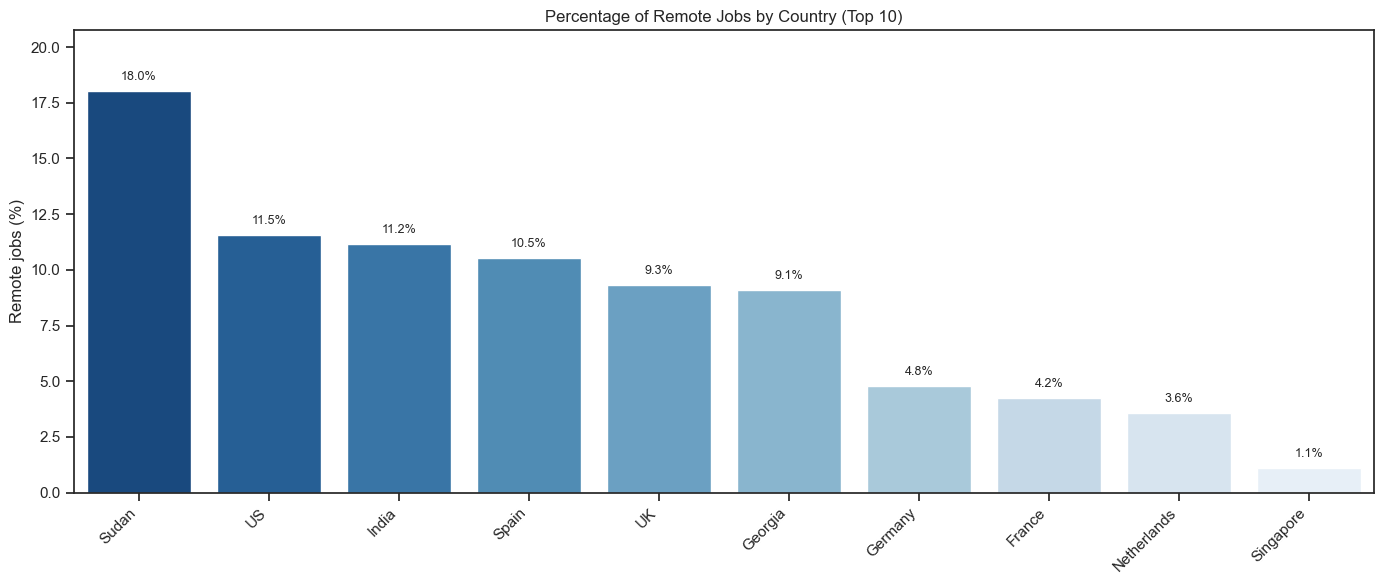

In [9]:
df['search_location'] = df['search_location'].apply(get_country)

ct = pd.crosstab(df["search_location"], df["job_work_from_home"])
print(type(ct))
top_10 = ct.sum(axis=1).sort_values(ascending=False).head(10).index

remote_jobs_percentage = (ct[True]/ct.sum(axis=1)) * 100
remote_percentage = remote_jobs_percentage[top_10].sort_values(ascending=True)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plot_df = pd.DataFrame({
    "country": remote_percentage.index,
    "remote_pct": remote_percentage.values
}).sort_values("remote_pct", ascending=False)

plt.figure(figsize=(14, 6))                     
ax = sns.barplot(
    x="country",
    y="remote_pct",
    data=plot_df,
    palette="Blues_r",
    order=plot_df["country"]                    
)

ax.set_ylabel("Remote jobs (%)")
ax.set_xlabel("") 
ax.set_title("Percentage of Remote Jobs by Country (Top 10)")

ax.set_ylim(0, plot_df["remote_pct"].max() * 1.15)  

plt.xticks(rotation=45, ha="right")              

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + (plot_df["remote_pct"].max() * 0.02),  
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

## Average jobs posted per day by region

Asia


/var/folders/3h/b50xl5913dl0kqp7zbychznr0000gn/T/ipykernel_9618/3909585909.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


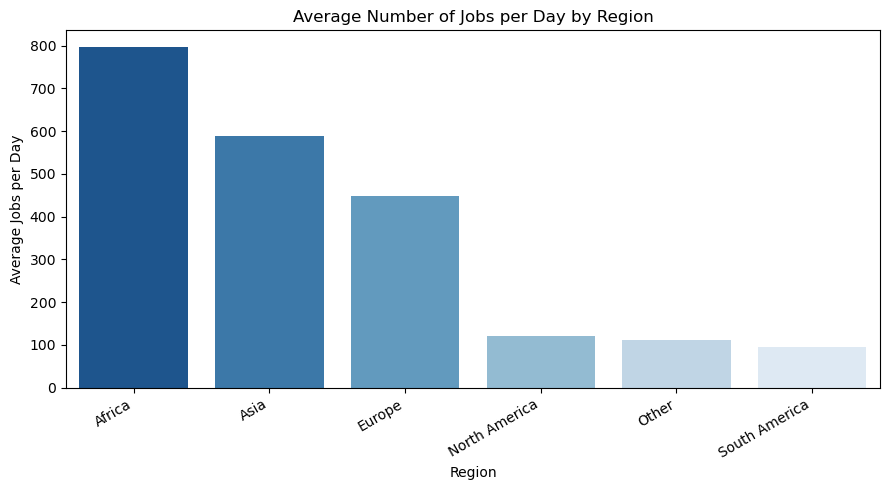

In [4]:
north_america_countries = (
    'Antigua and Barbuda','The Bahamas','Barbados', 'Belize','Canada','Costa Rica', 'Cuba','Dominica','Dominican Republic',
    'El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia',
    'Saint Vincent and the Grenadines','Trinidad and Tobago','United States of America', "US", "United States"
)

europe_countries = (
    'Albania','Andorra','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus',
    'Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland',
    'Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco',
    'Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russia',
    'San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine',
    'United Kingdom','Vatican City', "UK", "Czechia"
)

asia_countries = (
    'Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China',
    'Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan',
    'Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal',
    'North Korea','Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea',
    'Sri Lanka','Syria','Tajikistan','Thailand','Timor-Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen'
)

africa_countries = (
    'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon',
    'Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Djibouti',
    'Egypt','Equatorial Guinea','Eritrea','Eswatini','Ethiopia','Gabon','Gambia','Ghana',
    'Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar',
    'Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger',
    'Nigeria','Republic of the Congo','Rwanda','Sao Tome and Principe','Senegal',
    'Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan',
    'Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe'
)


south_america_countries = (
    'Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru',
    'Suriname','Uruguay','Venezuela'
)


regions = {
    north_america_countries: "North America",
    europe_countries: "Europe",
    asia_countries: "Asia",
    south_america_countries: "South America",
    africa_countries: "Africa"
}


def getRegion(country):
    for aliases, value in regions.items():
        if country in aliases:
            return value
    return "Other"
print(getRegion("Armenia"))

df['Region'] = df['job_location'].apply(getRegion)



jobs_posted_days = df['job_posted_date_only'] = df["job_posted_date"].dt.date
jobs_posted_days = df.groupby(["Region", "job_posted_date_only"]).size().reset_index()
jobs_posted_days.columns = ['Region', "Date", "Jobs Count"]

total_days = jobs_posted_days.groupby("Region").size()
jobs_c =jobs_posted_days.groupby("Region")['Jobs Count'].sum()
jobs_statistic_days = pd.DataFrame({
    "Total Days":total_days,
    "Total Jobs":jobs_c,
    "Average Per Day": (jobs_c / total_days)
})
jobs_statistic_days['Min Day'] = jobs_posted_days.groupby("Region")['Jobs Count'].min()
jobs_statistic_days['Max Day'] = jobs_posted_days.groupby("Region")['Jobs Count'].max()
jobs_statistic_days['Median'] = jobs_posted_days.groupby("Region")['Jobs Count'].median()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

sns.barplot(
    x=jobs_statistic_days.index,
    y=jobs_statistic_days["Average Per Day"].sort_values(ascending=False),
    palette="Blues_r"
)

plt.title("Average Number of Jobs per Day by Region")
plt.ylabel("Average Jobs per Day")

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## Average jobs posted per day by region


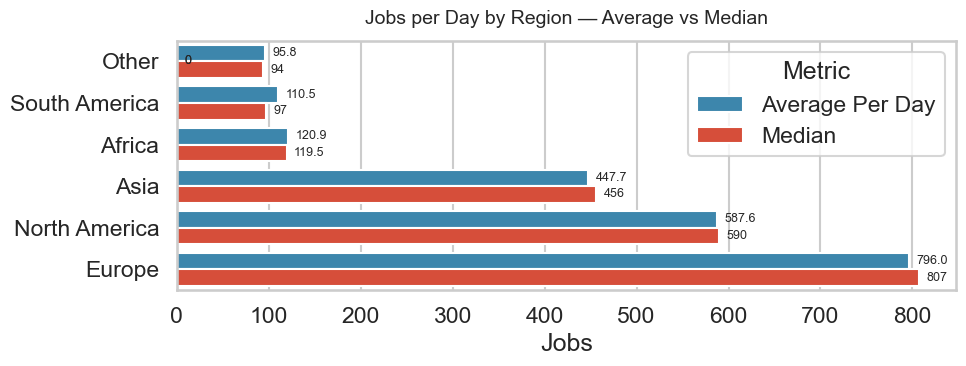

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

central = jobs_statistic_days.reset_index().melt(
    id_vars="Region",
    value_vars=["Average Per Day", "Median"],
    var_name="Metric",
    value_name="Jobs"
)

order = (
    central[central["Metric"] == "Average Per Day"]
    .sort_values("Jobs", ascending=True)["Region"]
    .tolist()
)

sns.set_theme(style="whitegrid", context="talk")  

fig_height = max(4, 0.5 * len(order))
fig, ax = plt.subplots(figsize=(10, fig_height))

palette = ["#2b8cbe", "#f03b20"]  
sns.barplot(
    data=central,
    x="Jobs",
    y="Region",
    hue="Metric",
    order=order,
    palette=palette,
    ax=ax,
    orient="h",
)

ax.set_xlabel("Jobs")
ax.set_ylabel("") 
ax.set_title("Jobs per Day by Region — Average vs Median", fontsize=14, pad=12)
ax.legend(title="Metric", loc="upper right")

max_val = central["Jobs"].max()
offset = max_val * 0.01 if max_val != 0 else 0.1
for p in ax.patches:
    width = p.get_width()
    if width == 0:
        label = "0"
    else:
        label = f"{width:,.0f}" if float(width).is_integer() else f"{width:,.1f}"
    ax.text(width + offset, p.get_y() + p.get_height() / 2, label, va="center", fontsize=9)

plt.tight_layout()
plt.show()



## Top hiring companies

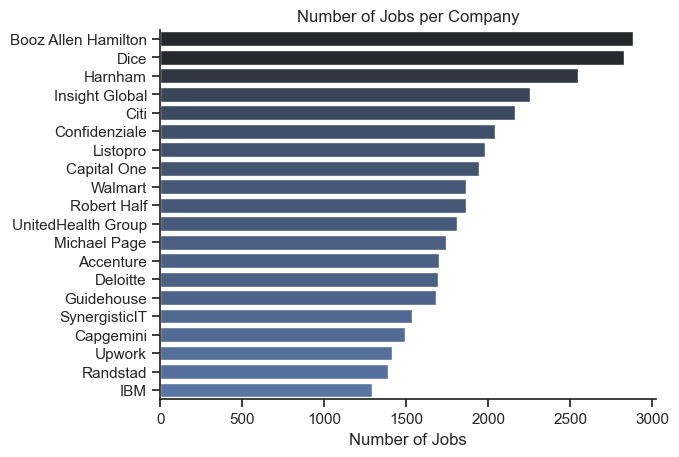

In [82]:
hiring_companies = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=hiring_companies, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

##                  Companies with most remote positions

job_work_from_home                       False  True  percentage
company_name                                                    
Listopro                                   414  1564   79.069767
Dice                                      1396  1431   50.619031
Upwork                                      39  1376   97.243816
Get It Recruit - Information Technology     43   895   95.415778
EPAM Systems                               709   424   37.422771
Harnham                                   2136   410   16.103692
Insight Global                            1914   340   15.084295
EPAM Anywhere                               33   303   90.178571
Crossover                                   87   274   75.900277
TELUS International AI Data Solutions       21   274   92.881356


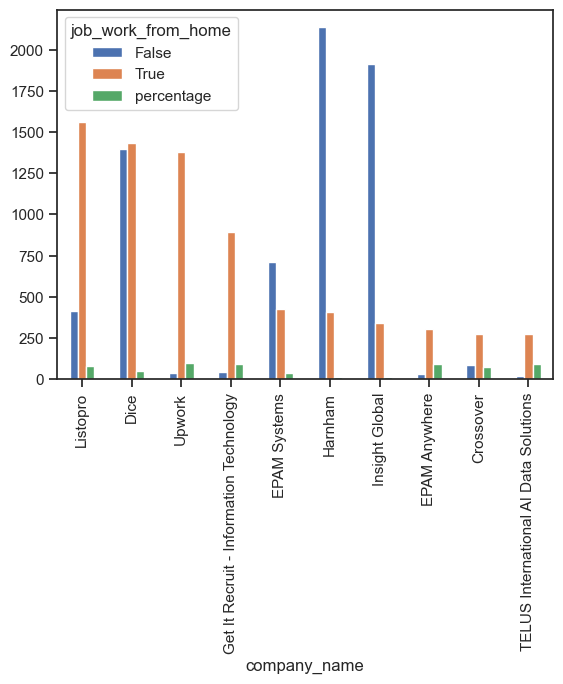

In [149]:
company_remote_jobs_ct = pd.crosstab(df['company_name'], df['job_work_from_home'])

company_remote_jobs_ct.sum(axis=1).sort_values(ascending=False)
top_10_companis_indexes = df.groupby("company_name").size().sort_values(ascending=False).head(15).index


remote_jobs_percentage_by_company = (company_remote_jobs_ct[True]/company_remote_jobs_ct.sum(axis=1)) * 100
remote_jobs_percentage_by_company.sort_values(ascending=False)
company_remote_jobs_ct['percentage'] = (company_remote_jobs_ct[True]/company_remote_jobs_ct.sum(axis=1)) * 100

company_remote_jobs_ct.sort_values(by=True, ascending=False).head(10).plot(kind="bar")

print(company_remote_jobs_ct.sort_values(by=True, ascending=False).head(10))


In [14]:
company_remote_jobs_ct.loc[top_10_companis_indexes].sort_values(by="percentage", ascending=False).head(10)

job_work_from_home,False,True,percentage
company_name,,,
Listopro,414,1564,79.069767
Dice,1396,1431,50.619031
Harnham,2136,410,16.103692
Insight Global,1914,340,15.084295
Robert Half,1644,218,11.707841
UnitedHealth Group,1686,122,6.747788
Michael Page,1680,59,3.392754
Accenture,1664,35,2.060035
Walmart,1824,38,2.040816


##          Full-time vs part-time distribution

In [125]:
import ast

def clean_scheduly_type(schedule):
    if not isinstance(schedule, str):
        return schedule 
    return schedule.lower().replace(" and ", ", ").strip()


# print(clean_scheduly_type("Full-time and Part-time, Intern"))
df['job_schedule_type'] = df['job_schedule_type'].apply(clean_scheduly_type)

df['job_schedule_type'] = df['job_schedule_type'].str.replace(",,", ",")
df['job_schedule_type'] = df["job_schedule_type"].str.split(", ")

                                       Counts  Percentage
job_schedule_type                                        
Full-time                              701662   90.774217
Contractor                              34793    4.501181
Internship                               8741    1.130826
Part-time                                7881    1.019567
Full-time and Part-time                  6287    0.813351
Full-time and Temp work                  2603    0.336751
Full-time and Internship                 2340    0.302726
Full-time and Contractor                 2292    0.296517
Contractor and Temp work                 2283    0.295352
Temp work                                2169    0.280604
Full-time, Part-time, and Internship      264    0.034154
Part-time and Internship                  255    0.032989
Temp work and Internship                  211    0.027297
Full-time, Contractor, and Temp work      194    0.025098
Full-time, Temp work, and Internship      173    0.022381
Part-time and 

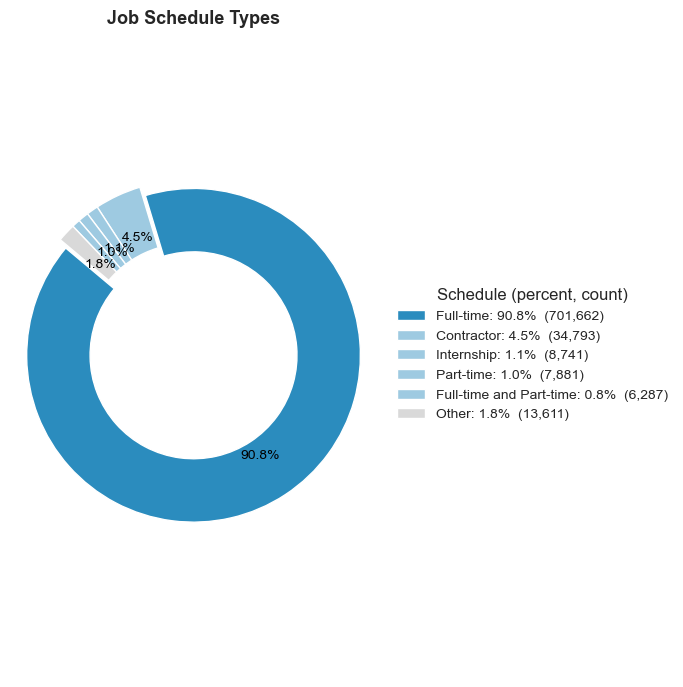

In [8]:
job_schedule_st = df.explode(column='job_schedule_type').groupby("job_schedule_type").size().sort_values(ascending=False).to_frame(name="Counts")
job_schedule_st['Percentage'] = (job_schedule_st["Counts"] / job_schedule_st['Counts'].sum()) * 100
print(job_schedule_st)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

top_n = 5                      
accent_color = '#2b8cbe'       
muted_color = '#9ecae1'        
grey_for_other = '#d9d9d9'     

df = job_schedule_st.copy(deep=True)

pct_col = next((c for c in df.columns if 'perc' in c.lower()), None)
count_col = next((c for c in df.columns if 'count' in c.lower()), None)

if pct_col is None:
    if 'percentage' in df.columns:
        pct_col = 'percentage'
if count_col is None:
    if 'counts' in df.columns:
        count_col = 'counts'

if df.index.name is not None and df.index.name.lower().startswith('job'):
    labels = df.index.astype(str)
else:
    if 'job_schedule_type' in df.columns:
        labels = df['job_schedule_type'].astype(str)
    else:
        labels = df.index.astype(str)

counts = pd.to_numeric(df[count_col], errors='coerce') if count_col else None
perc = pd.to_numeric(df[pct_col], errors='coerce') if pct_col else None

if perc is None and counts is not None:
    perc = counts / counts.sum() * 100

perc = perc.fillna(0)
if perc.max() <= 1.0:
    perc = perc * 100

plot_df = pd.DataFrame({'label': labels.astype(str), 'count': counts.fillna(0).astype(int) if counts is not None else 0, 'perc': perc})
plot_df = plot_df.groupby('label', as_index=False).sum()
plot_df = plot_df.sort_values('perc', ascending=False).reset_index(drop=True)

if len(plot_df) > top_n:
    top = plot_df.iloc[:top_n].copy()
    other = plot_df.iloc[top_n:].sum(numeric_only=True)
    other_row = pd.DataFrame([{
        'label': 'Other',
        'count': int(other['count']),
        'perc': float(other['perc'])
    }])
    plot_df = pd.concat([top, other_row], ignore_index=True)

colors = []
for i, lab in enumerate(plot_df['label']):
    if i == 0:
        colors.append(accent_color)
    elif lab == 'Other':
        colors.append(grey_for_other)
    else:
        colors.append(muted_color)

sns.set_style('white')
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 11

labels = plot_df['label'].tolist()
sizes = plot_df['perc'].tolist()
counts = plot_df['count'].tolist()

explode = [0.06 if i == 0 else 0.0 for i in range(len(labels))]  

fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 1.0 else '', 
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.72,
    wedgeprops=dict(width=0.38, edgecolor='white'),
    textprops=dict(color='black', fontsize=10)
)

centre_circle = plt.Circle((0, 0), 0.38, fc='white')
ax.add_artist(centre_circle)
ax.axis('equal')
ax.set_title('Job Schedule Types', fontsize=13, weight='semibold')

legend_labels = [f"{lab}: {pct:.1f}%  ({cnt:,d})" for lab, pct, cnt in zip(labels, sizes, counts)]
ax.legend(wedges, legend_labels, title='Schedule (percent, count)',
          loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=10)

plt.tight_layout()
plt.show()

## Jobs Benefits

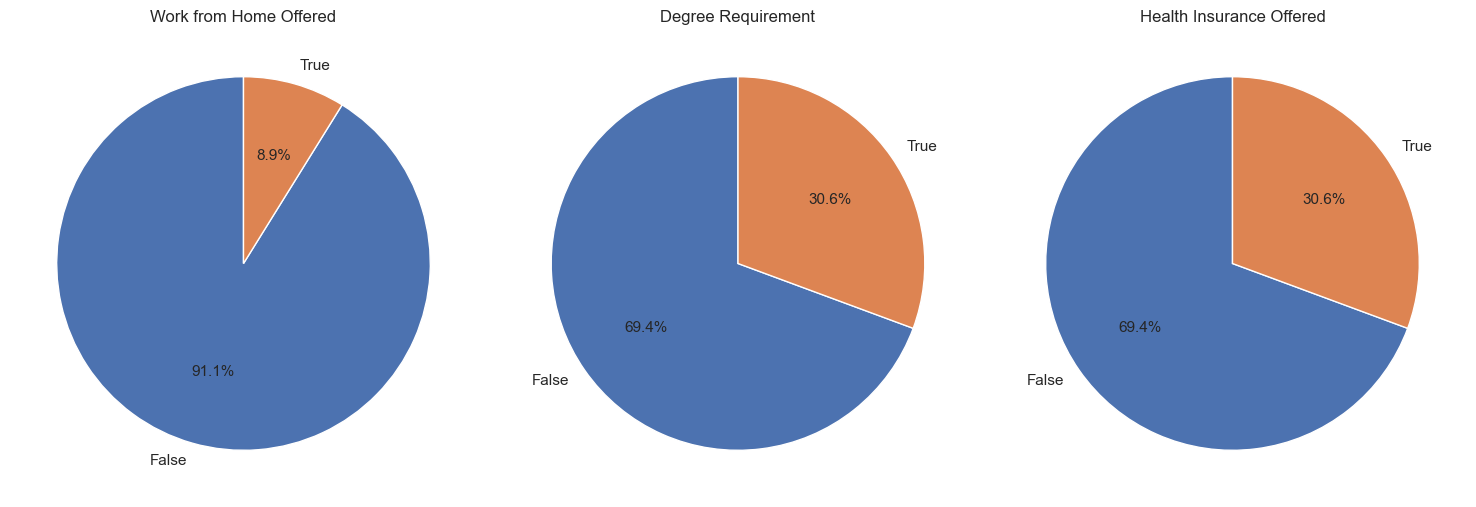

In [144]:
import matplotlib.pyplot as plt

columns = [
    "job_work_from_home",
    "Degree Required",
    "job_no_degree_mention"
]

titles = [
    "Work from Home Offered",
    "Degree Requirement",
    "Health Insurance Offered"
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col, title in zip(axes, columns, titles):
    counts = df[col].value_counts()
    
    ax.pie(
        counts,
        labels=counts.index,
        autopct="%.1f%%",
        startangle=90
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()